# **MLT Assignment 1: Predicting Airline Passenger Satisfaction**

An approach to predict passenger satisfaction based on satisfaction survey

# **Student Details**

**Group Id**: 06

**Group Name**: Neural Navigators

**Student Roll No & Name**:

A035_SAYALI_MAHURKAR

A047_RITESH_PATIL

A064_DRISHTI_SHAH

**Dataset Information**

The dataset used for the current case study has 129880 samples and 25 inputs.

Data can be downloaded [here](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

**Attribute Information**

This dataset contains an airline passenger satisfaction survey.

The **input variables** are:

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

**Output variable**:

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# **Learnings**
**Model** **Interpretation**: Understanding and interpreting the output of machine learning models played a crucial role in deriving actionable insights and making data-driven business decisions

**EDA**: It uncovered significant trends and patterns in the airline passenger satisfaction data.

**Feature Selection**: Learnt how to identifying and select the most relevant features to improve the performance of machine learning model and techniques and provide valuable insights into the factors influencing satisfaction of passengers

Comparative analysis of different classification models provided insights into the most effective models for predicting satisfaction of passengers

Understanding how various passenger attributes (such as age, travel class, and flight distance) impact satisfaction can help design personalized service strategies.

Insights from the analysis can guide airlines in enhancing passenger experiences, improving operational efficiency, and boosting customer retention.









# **Machine Learning problem and objectives**
For the airline passenger satisfaction dataset, we are dealing with a binary classification problem where the target variable represents whether a passenger is satisfied or dissatisfied with their flight experience.

**Project structure**

The structure of the project is

1. EDA: Exploratory Data Analysis

2. Data Cleaning

3. Feature engineering

4. Machine Learning- (Classification modeling)


# **Performance Metric**

The performance metric in use for evaluation is the accuracy score




In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv(r'/content/drive/MyDrive/train.csv.zip')
test = pd.read_csv(r'/content/drive/MyDrive/test.csv.zip')

In [ ]:
train.shape

(103904, 25)

In [ ]:
test.shape

(25976, 25)

In [ ]:
data = pd.concat([train, test], axis=0)

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


**Basic info about the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


Only one column has missing values

In [ ]:
data.shape

(129880, 25)

In [ ]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
skewness = data['Arrival Delay in Minutes'].skew()
print(f"Skewness of Arrival Delay: {skewness}")


Skewness of Arrival Delay: 6.670124610533306


Using median to fill the missing values as the data is skewed

In [ ]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(0)

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
data['satisfaction'].value_counts(normalize=True)  # Shows percentage distribution

,proportion
satisfaction,
neutral or dissatisfied,0.565537
satisfied,0.434463


The data is a balanced dataset

<Axes: xlabel='satisfaction', ylabel='count'>

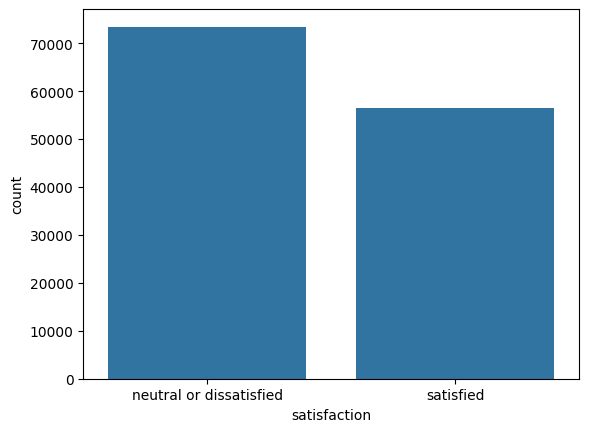

In [ ]:
import seaborn as sns
sns.countplot(x='satisfaction', data=data)

In [ ]:
# Check for duplicates in 'id' column
duplicate_ids = data['id'].duplicated()

# Print the number of duplicate IDs
print(f"Number of duplicate IDs: {duplicate_ids.sum()}")

# If you want to see the actual duplicate IDs, you can use:
# print(data[duplicate_ids]['id'])


Number of duplicate IDs: 0


There are no duplicates in the dataset

# **Feature** **selection**

In [ ]:
# Drop 'id' and 'Unnamed: 0' columns
data = data.drop(columns=['id', 'Unnamed: 0'])

These columns are not neccessary for the analysis , therefore droping the columns

In [ ]:
data.duplicated().sum()

0

In [ ]:
#there is very less correlation between the features so that we are not performing feature selection

# **EDA**

<ipython-input-12-1ff31e7deb40>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=data, ax=ax1, palette=['#f57e7e', '#88d0f3']) # Assuming target_colors is defined and contains these color codes
<ipython-input-12-1ff31e7deb40>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data['satisfaction'].value_counts().index, fontsize=15) # Replace 'df' with 'data'


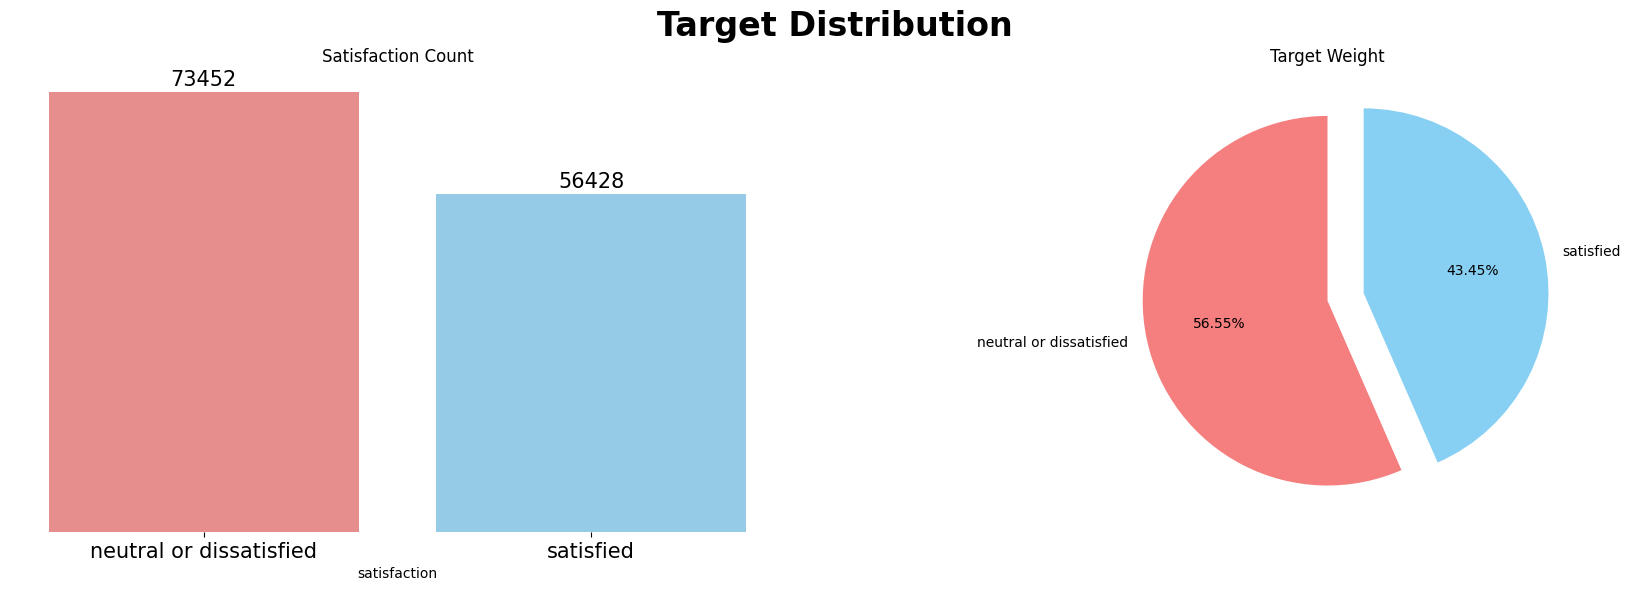

In [ ]:
#EDA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Import gridspec
import seaborn as sns
fig = plt.figure(figsize=(22, 6))
plt.suptitle('Target Distribution', weight='bold', fontsize=24, fontname='Arial')

grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Satisfaction Count')

# Replace 'df' with 'data'
sns.countplot(x='satisfaction', data=data, ax=ax1, palette=['#f57e7e', '#88d0f3']) # Assuming target_colors is defined and contains these color codes

#border vom plot entfernen
for spine in ax1.spines.values():
    spine.set_visible(False)
#y achse entfernen
ax1.get_yaxis().set_visible(False)

for index,value in enumerate(data['satisfaction'].value_counts()): # Replace 'df' with 'data'
    ax1.annotate(value,xy=(index,value+2000), ha='center', va='center', fontsize=15)
#label größer machen
ax1.set_xticklabels(data['satisfaction'].value_counts().index, fontsize=15) # Replace 'df' with 'data'

#pie plot

ax2=fig.add_subplot(grid[0, 1:])
ax2.set_title('Target Weight')
label=list(data['satisfaction'].value_counts().index) # Replace 'df' with 'data'
value=list(data['satisfaction'].value_counts().values) # Replace 'df' with 'data'
#pie chart
ax2.pie(value, labels=label, autopct='%1.2f%%', explode=(0,0.2), startangle =90, colors =['#f57e7e', '#88d0f3']) # Assuming target_colors contains these color codes

plt.show()

Dataset is balanced. Here 0 denotes neutral or dissatisfied passengers and 1 denotes satisfied passengers

<ipython-input-16-fe8acbeda8c2>:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax4.legend(fontsize=20)


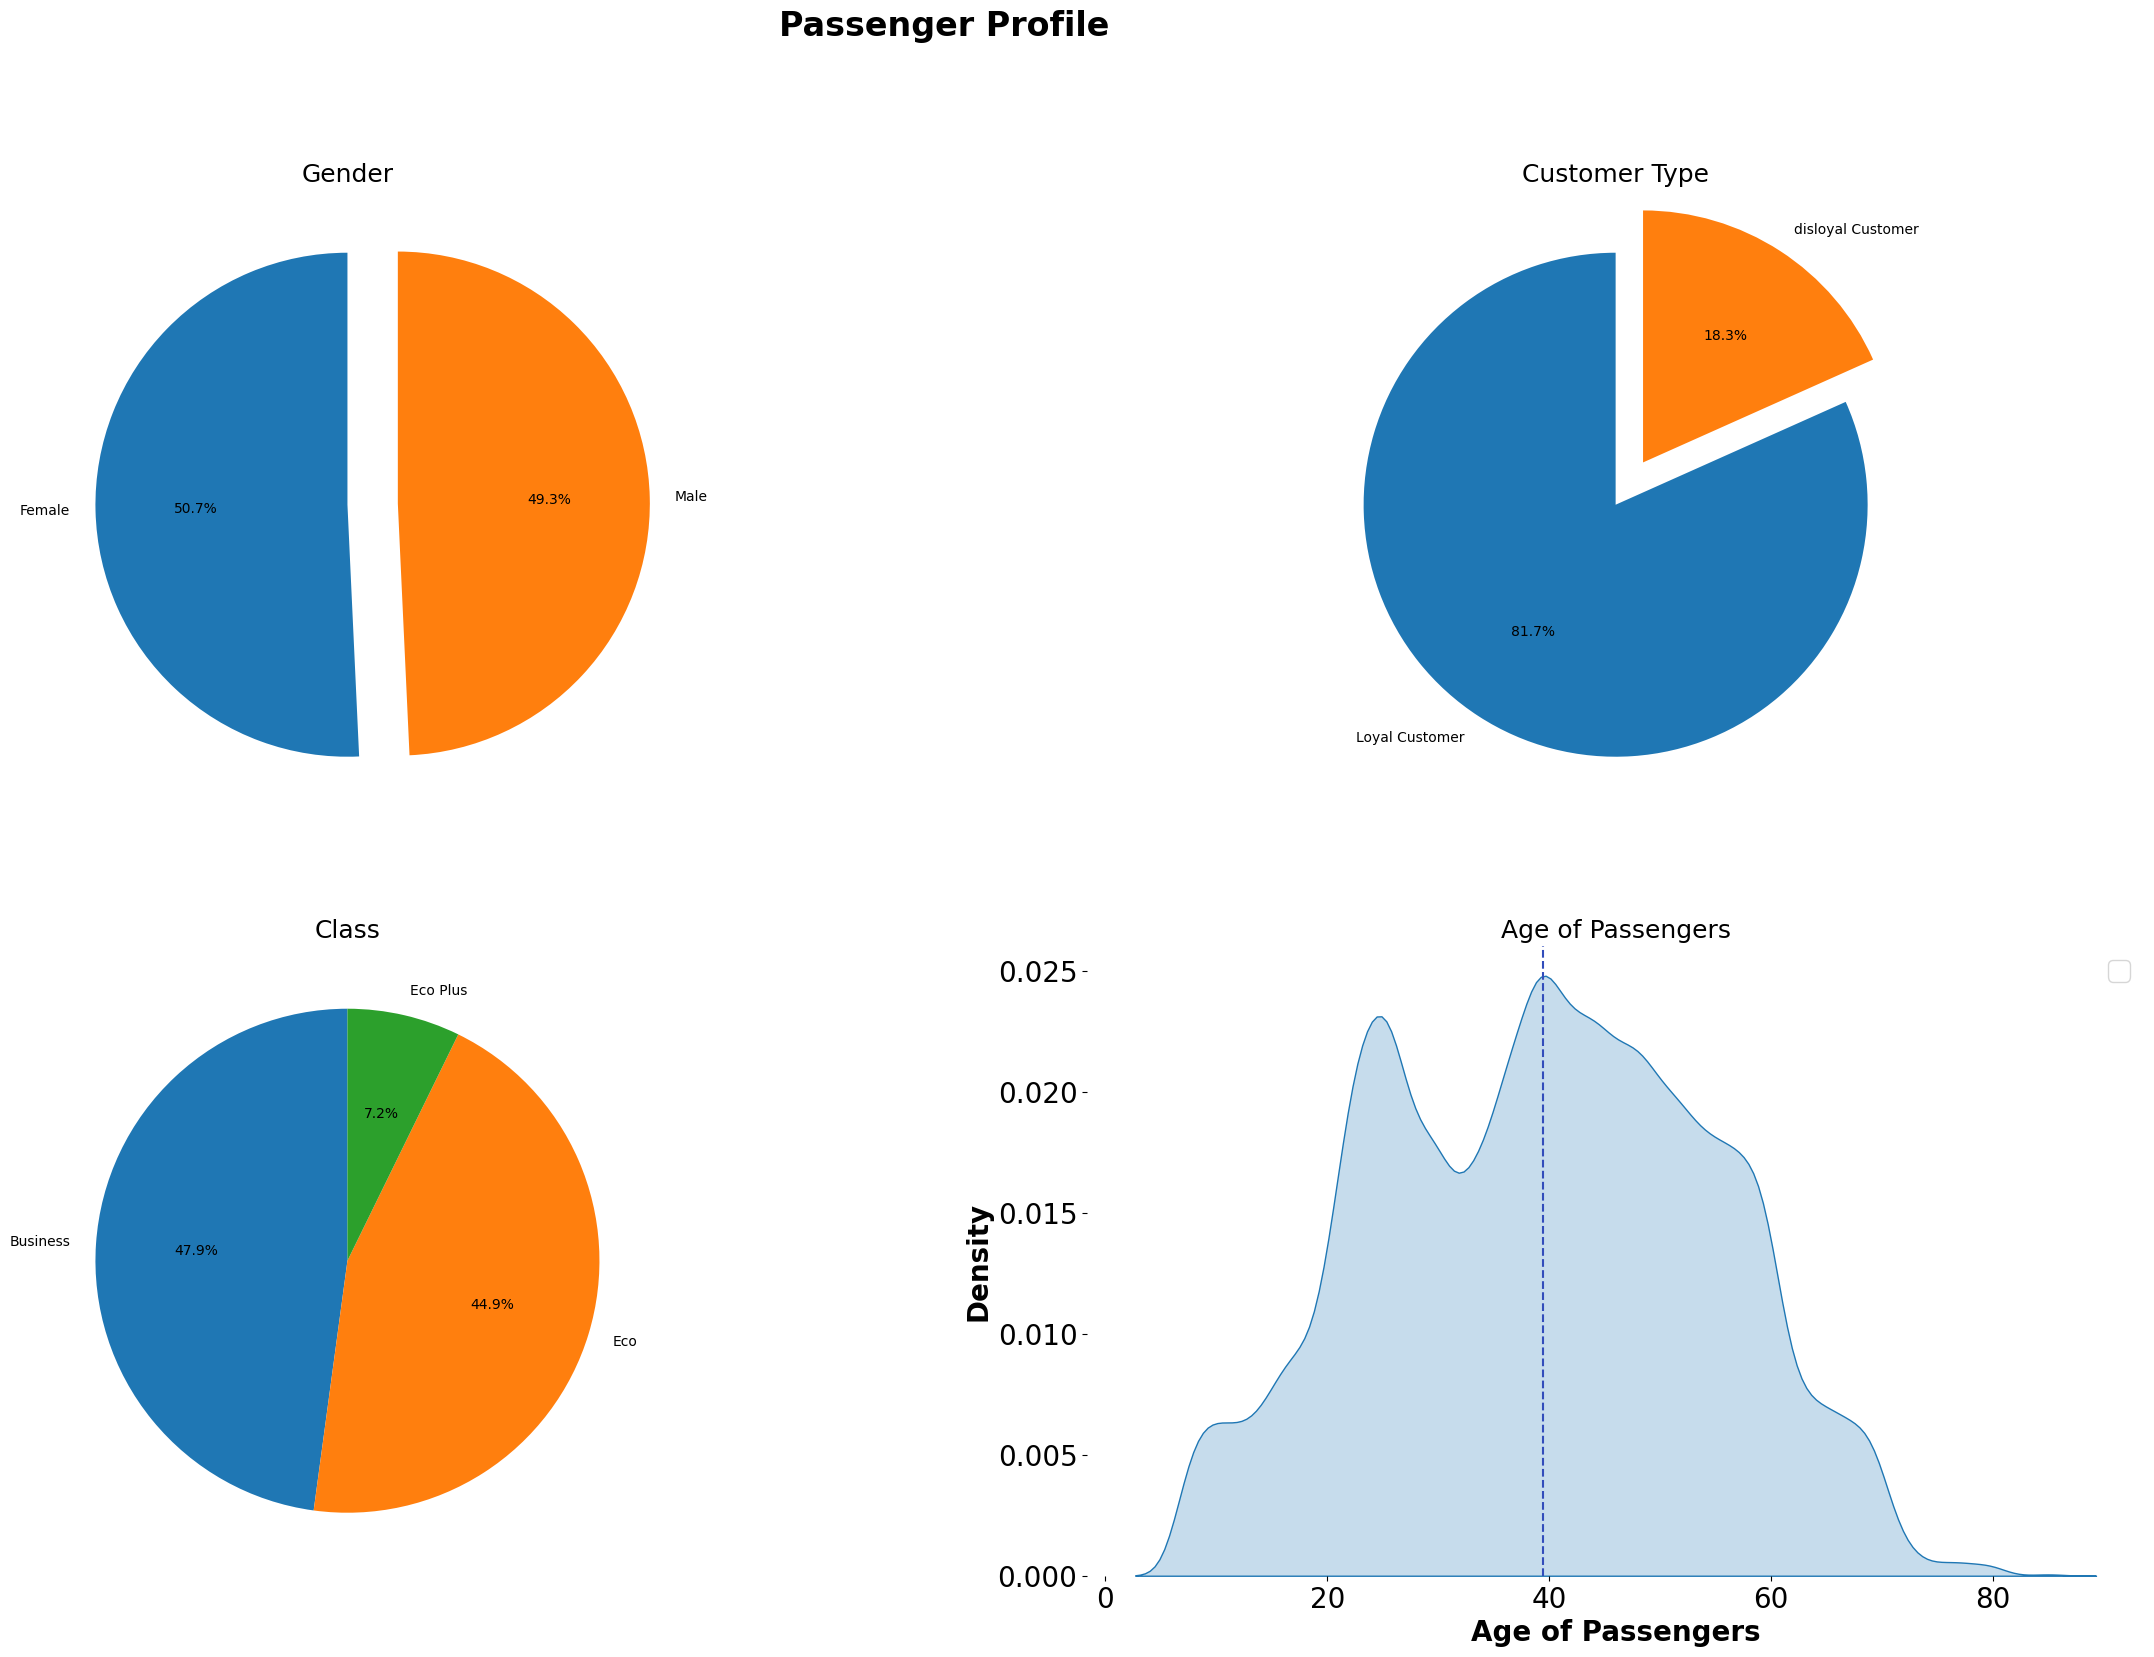

In [ ]:
#gender, customertype , class und age

fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Profile', weight='bold', fontsize=24, fontname='Arial')

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Gender', fontsize=18)

# Replace 'df' with 'data' in the following lines
label=list(data['Gender'].value_counts().index)
value=list(data['Gender'].value_counts().values)
#pie chart
ax1.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.2), startangle =90)

#zweiter plot

ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Customer Type', fontsize=18)

# Replace 'df' with 'data' in the following lines
label=list(data['Customer Type'].value_counts().index)
value=list(data['Customer Type'].value_counts().values)
#pie chart
ax2.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.2), startangle =90)

#dritter plot

ax3 = fig.add_subplot(grid[1,:1])
ax3.set_title('Class', fontsize=18)

# Replace 'df' with 'data' in the following lines
label=list(data['Class'].value_counts().index)
value=list(data['Class'].value_counts().values)
#pie chart
ax3.pie(value, labels=label, autopct='%1.1f%%', startangle =90)
#wenn explode muss man 3 variblen geben

#vierter plot age kde plot um die relative altersverteilung zu sehen

ax4 = fig.add_subplot(grid[1,1:])
ax4.set_title('Age of Passengers', fontsize=18)

# Replace 'df' with 'data' in the following line
sns.kdeplot(data=data, x='Age', ax=ax4, fill=True)

#tick size ändern
ax4.tick_params(axis='x',labelsize = 20)
ax4.tick_params(axis='y',labelsize = 20)

#label size vergrößern

ax4.set_xlabel('Age of Passengers', fontsize=20, weight ='bold')
ax4.set_ylabel('Density', fontsize=20, weight ='bold')

for spine in ax4.spines.values():
    spine.set_visible(False)

# Replace 'df' with 'data' in the following line
ax4.axvline(data['Age'].mean(), linestyle='--', color='#324DBB')
ax4.legend(fontsize=20)

plt.show()

1. There is same proportion of male and female passengers in the dataset
2. Majority of passengers are loyal customers
3. Only a few number of passengers travel by Eco plus class while passengers travelling by Business and Eco are almost similar
4. Mean age of passengers is 40 years

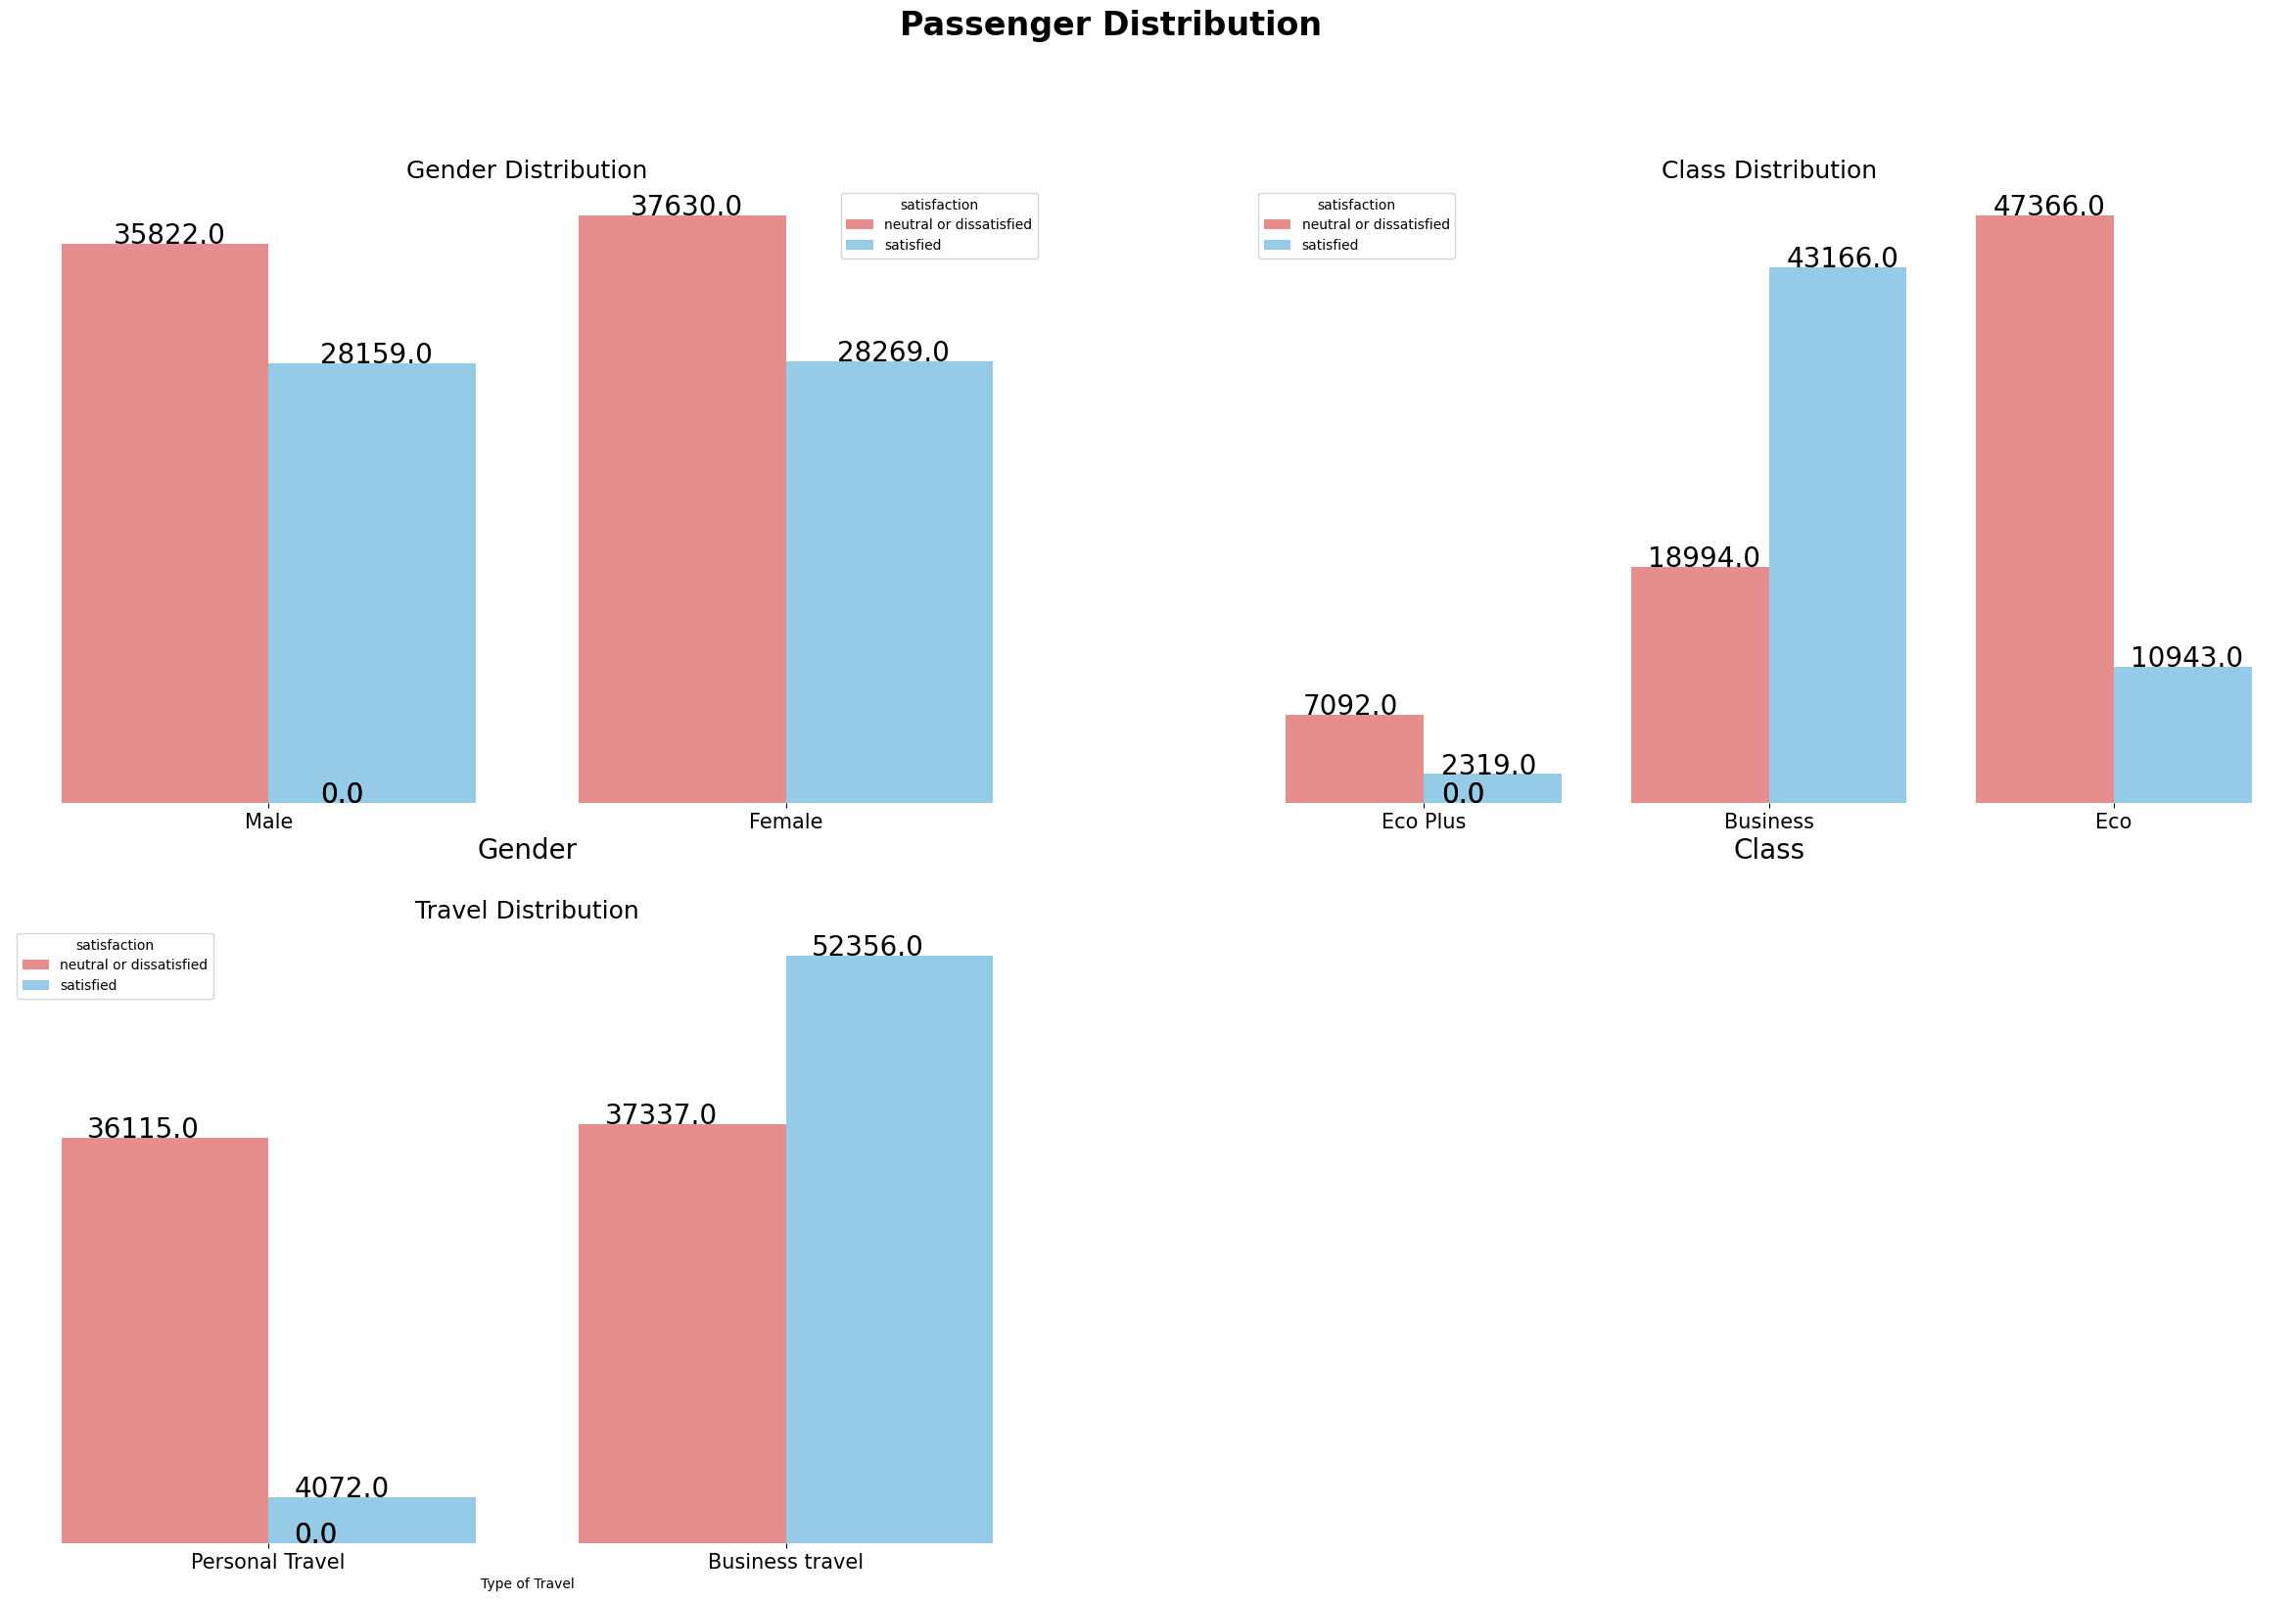

In [ ]:
# Assuming 'data' is the DataFrame containing the data
# and target_colors is a list of colors for the palette

# Example target_colors (you need to define it):
target_colors = ['#f57e7e', '#88d0f3']  # Define as per your color codes

#Wie fügen wir nun zusammen wer von welchen Gruppen zufrieden ist

fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Distribution', weight='bold', fontsize=24, fontname='Arial')
#Distribution = wie ist die Satisfactionn aufgeteilt

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Gender Distribution', fontsize=18)

# Replace 'df' with 'data' in the following lines
sns.countplot(x=data['Gender'], hue=data['satisfaction'], ax=ax1, palette=target_colors)

for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1,p.get_height()), fontsize=20)

ax1.get_yaxis().set_visible(False)
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.tick_params(axis='x', labelsize=15)
ax1.set_xlabel('Gender', fontsize=20)

#Zweiter Plot Class



grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax2 = fig.add_subplot(grid[0, 1:])
ax2.set_title('Class Distribution', fontsize=18)

# Replace 'df' with 'data' in the following lines
sns.countplot(x=data['Class'], hue=data['satisfaction'], ax=ax2, palette=target_colors)

for p in ax2.patches:
    ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05,p.get_height()), fontsize=20)

ax2.get_yaxis().set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.tick_params(axis='x', labelsize=15)
ax2.set_xlabel('Class', fontsize=20)

#dritter plot

grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax3 = fig.add_subplot(grid[1, :1])
ax3.set_title('Travel Distribution', fontsize=18)

# Replace 'df' with 'data' in the following lines
sns.countplot(x=data['Type of Travel'], hue=data['satisfaction'], ax=ax3, palette=target_colors)

for p in ax3.patches:
    ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05,p.get_height()), fontsize=20)

ax3.get_yaxis().set_visible(False)
for spine in ax3.spines.values():
    spine.set_visible(False)
ax3.tick_params(axis='x', labelsize=15)

The Eco class passengers are highly dissatisfied. Passengers boarding in for personal travel too are quite dissatified. And overall gender has no significant imapct on satifaction.


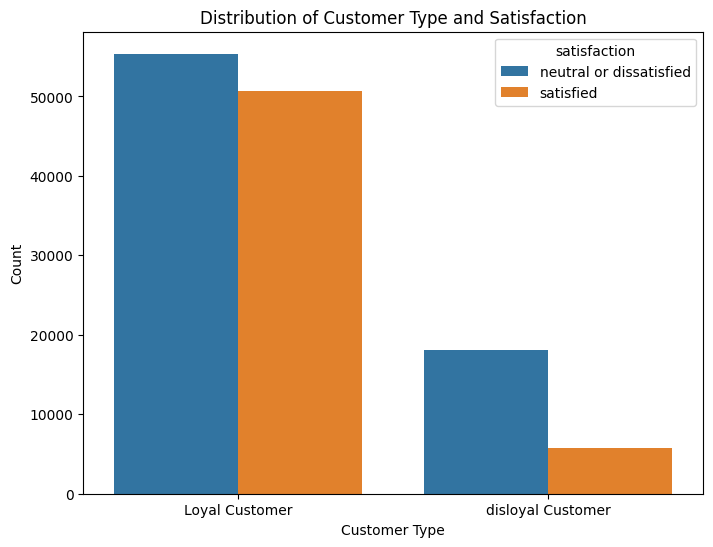

In [ ]:
# prompt: check distribution of type of customers and satifaction

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as shown in the provided code

# Distribution of customer type and satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Type', hue='satisfaction', data=data)
plt.title('Distribution of Customer Type and Satisfaction')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


The service might be similar to both, hence loyal and disloyal customers show dissatisfaction. Improving service to loyal customers (by arranging some perks) may help.


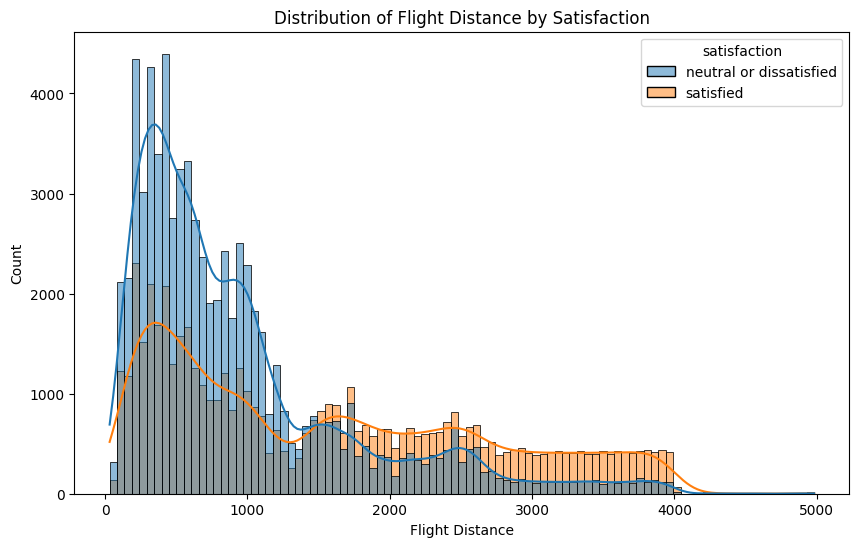

In [ ]:
# prompt: distribution of flight distance on satisfaction

import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded as shown in the provided code

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Flight Distance', hue='satisfaction', kde=True)
plt.title('Distribution of Flight Distance by Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.show()


Lesser the distance travelled, lesser is the satisfaction.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 non

Variable: Age, Data Type: int64
                           count       mean        std  min   25%   50%   75%  \
satisfaction                                                                    
neutral or dissatisfied  73452.0  37.650997  16.465802  7.0  25.0  37.0  50.0   
satisfied                56428.0  41.741015  12.797669  7.0  32.0  43.0  51.0   

                          max  
satisfaction                   
neutral or dissatisfied  85.0  
satisfied                85.0  


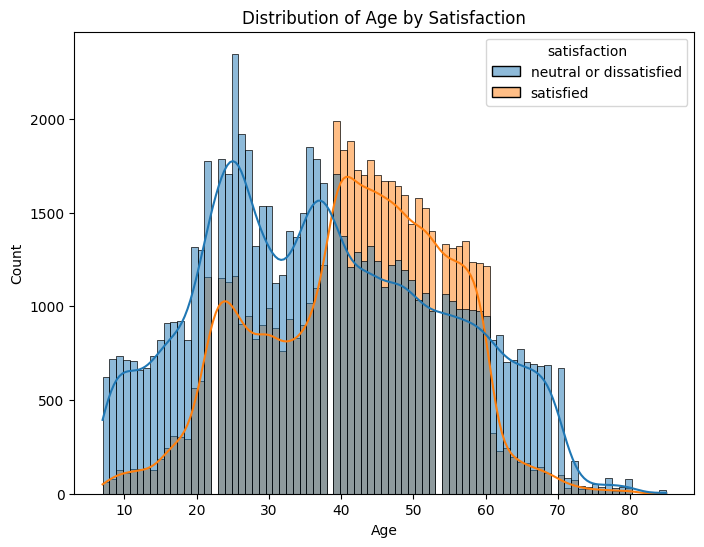

Variable: Flight Distance, Data Type: int64
                           count         mean          std   min    25%  \
satisfaction                                                              
neutral or dissatisfied  73452.0   929.715420   791.293326  31.0  372.0   
satisfied                56428.0  1529.539165  1127.596799  31.0  525.0   

                            50%     75%     max  
satisfaction                                     
neutral or dissatisfied   674.0  1149.0  4983.0  
satisfied                1249.0  2407.0  4983.0  


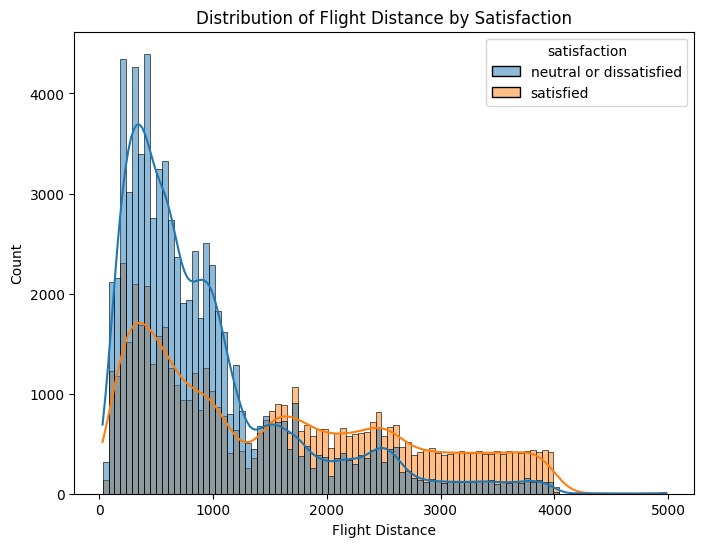

Variable: Inflight wifi service, Data Type: int64
                           count      mean      std  min  25%  50%  75%  max
satisfaction                                                                
neutral or dissatisfied  73452.0  2.398423  0.96425  0.0  2.0  2.0  3.0  5.0
satisfied                56428.0  3.158609  1.59071  0.0  2.0  4.0  5.0  5.0


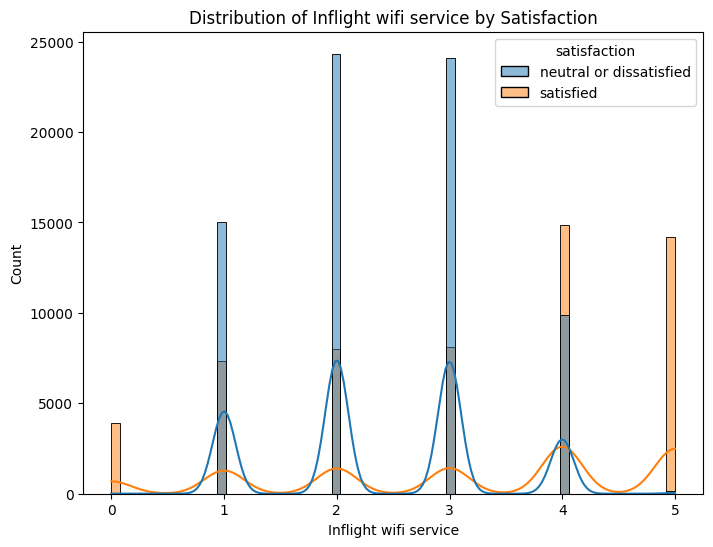

Variable: Departure/Arrival time convenient, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  3.130221  1.500602  0.0  2.0  3.0  4.0  5.0
satisfied                56428.0  2.963068  1.555052  0.0  2.0  3.0  4.0  5.0


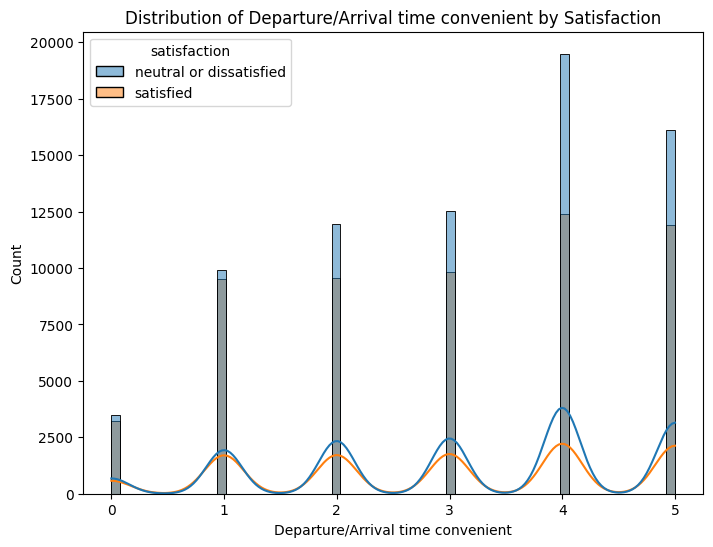

Variable: Ease of Online booking, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  2.549393  1.209112  0.0  2.0  3.0  3.0  5.0
satisfied                56428.0  3.026955  1.578157  0.0  2.0  3.0  4.0  5.0


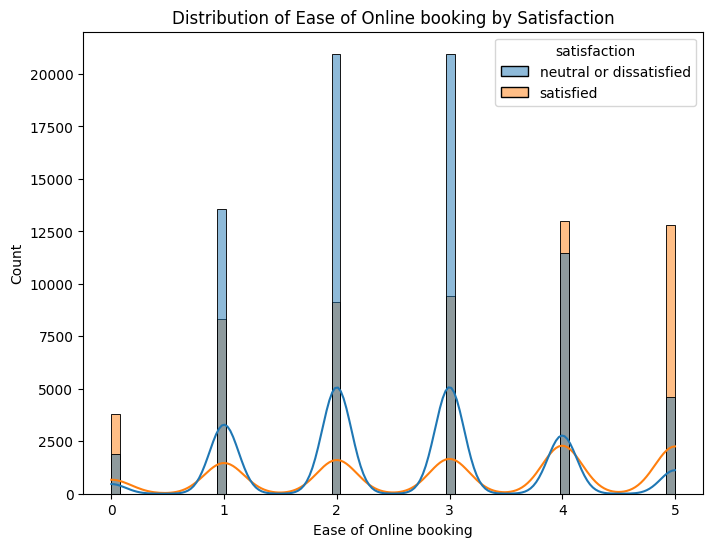

Variable: Gate location, Data Type: int64
                           count      mean      std  min  25%  50%  75%  max
satisfaction                                                                
neutral or dissatisfied  73452.0  2.980055  1.19973  1.0  2.0  3.0  4.0  5.0
satisfied                56428.0  2.972850  1.37433  0.0  2.0  3.0  4.0  5.0


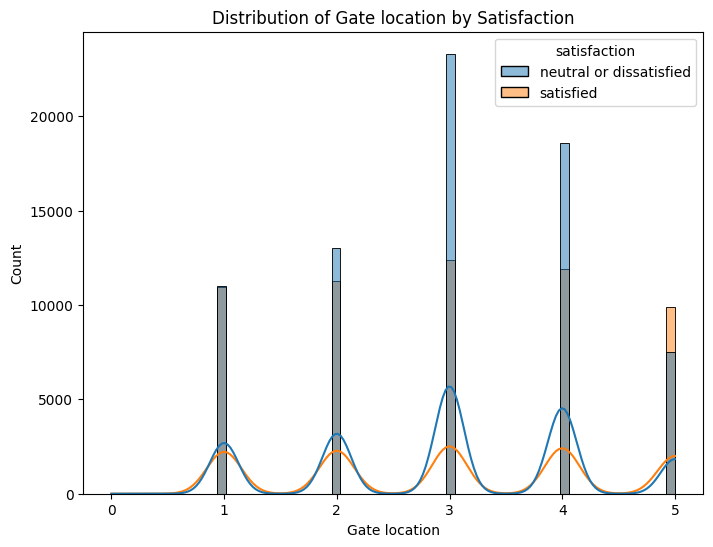

Variable: Food and drink, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  2.958422  1.347681  0.0  2.0  3.0  4.0  5.0
satisfied                56428.0  3.525448  1.234932  0.0  3.0  4.0  5.0  5.0


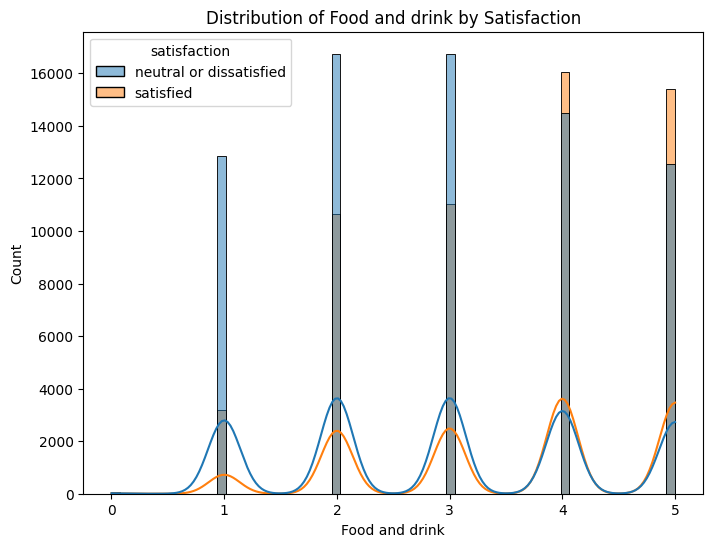

Variable: Online boarding, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  2.658621  1.147048  0.0  2.0  3.0  3.0  5.0
satisfied                56428.0  4.025856  1.195609  0.0  4.0  4.0  5.0  5.0


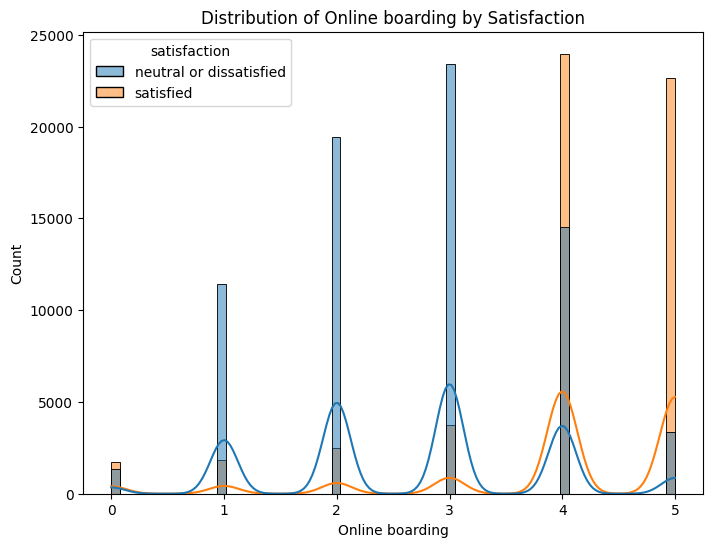

Variable: Seat comfort, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  3.037998  1.304040  0.0  2.0  3.0  4.0  5.0
satisfied                56428.0  3.966417  1.142429  1.0  4.0  4.0  5.0  5.0


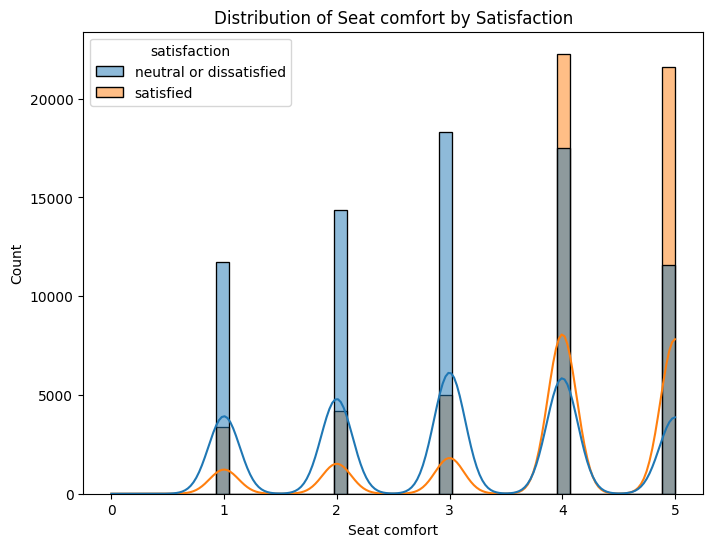

Variable: Inflight entertainment, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  2.892433  1.324212  0.0  2.0  3.0  4.0  5.0
satisfied                56428.0  3.964202  1.078943  1.0  4.0  4.0  5.0  5.0


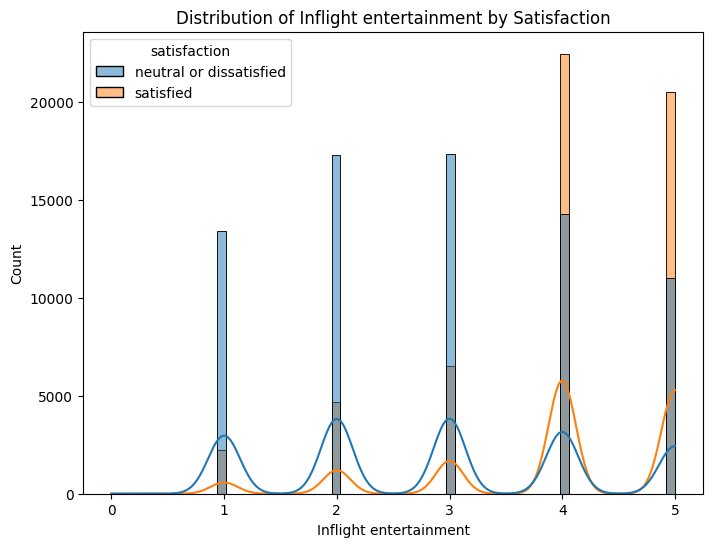

Variable: On-board service, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  3.019537  1.283096  0.0  2.0  3.0  4.0  5.0
satisfied                56428.0  3.856171  1.128800  1.0  3.0  4.0  5.0  5.0


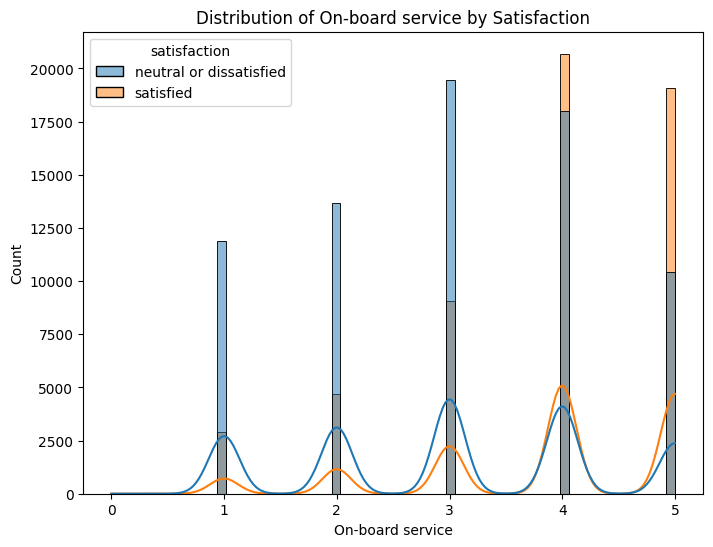

Variable: Leg room service, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  2.990443  1.304366  0.0  2.0  3.0  4.0  5.0
satisfied                56428.0  3.820054  1.176374  0.0  3.0  4.0  5.0  5.0


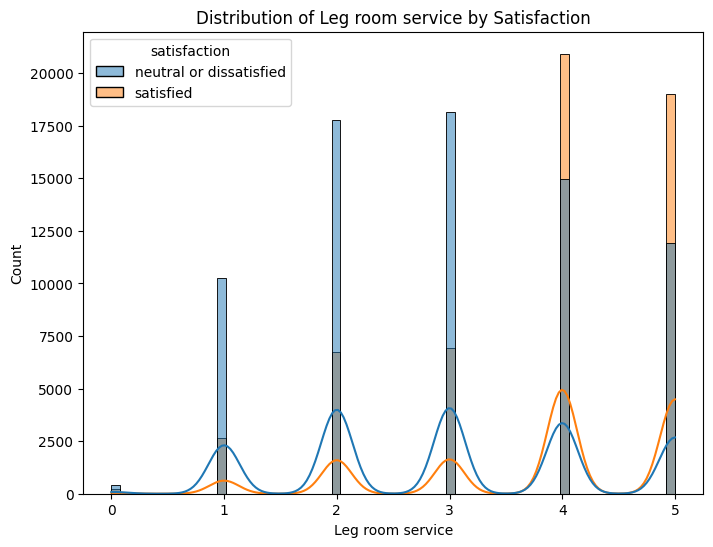

Variable: Baggage handling, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  3.374912  1.175043  1.0  3.0  4.0  4.0  5.0
satisfied                56428.0  3.966914  1.099795  1.0  4.0  4.0  5.0  5.0


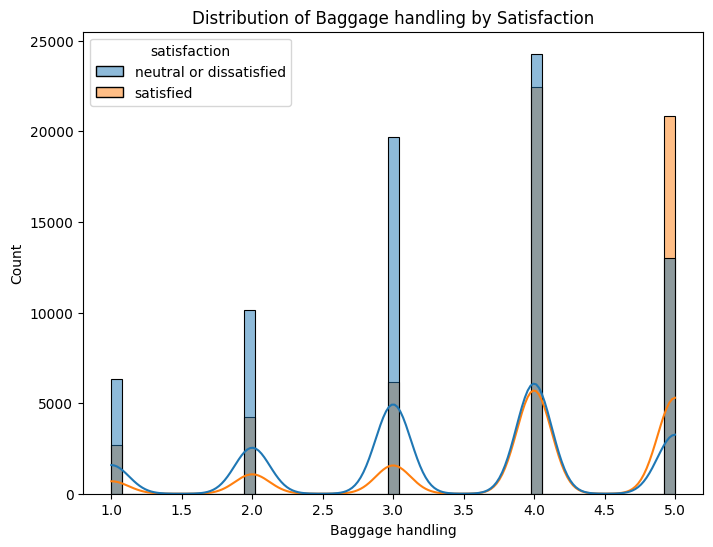

Variable: Checkin service, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  3.042967  1.282169  0.0  2.0  3.0  4.0  5.0
satisfied                56428.0  3.649004  1.158670  1.0  3.0  4.0  5.0  5.0


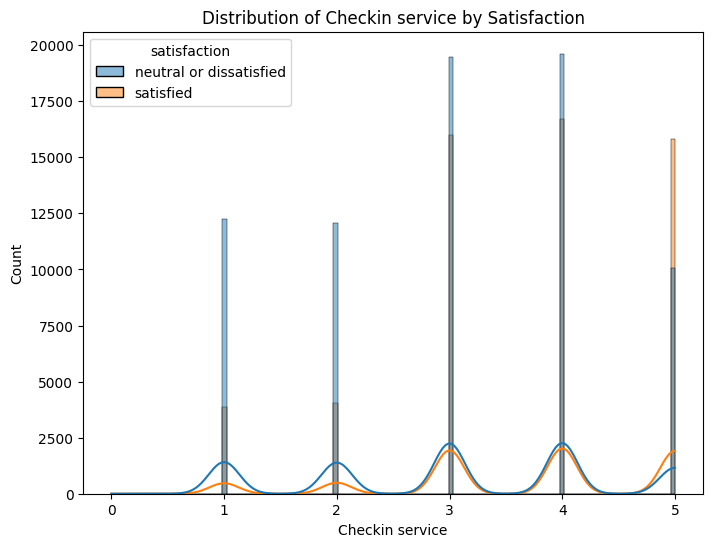

Variable: Inflight service, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  3.389601  1.176514  0.0  3.0  4.0  4.0  5.0
satisfied                56428.0  3.970990  1.092652  1.0  4.0  4.0  5.0  5.0


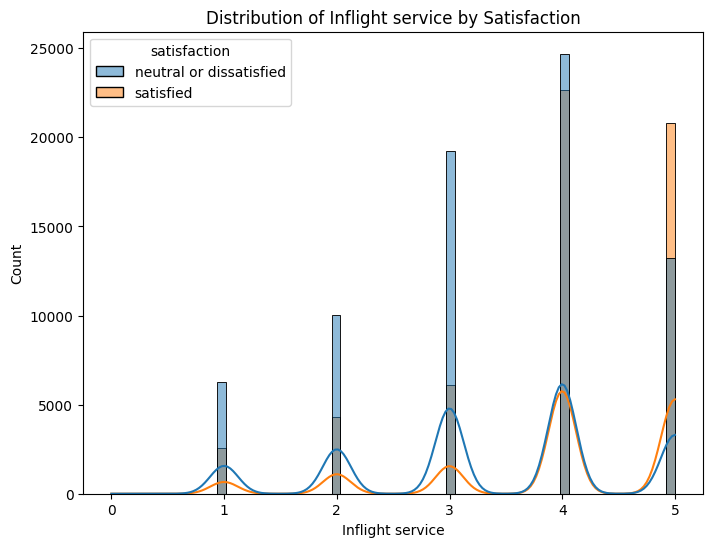

Variable: Cleanliness, Data Type: int64
                           count      mean       std  min  25%  50%  75%  max
satisfaction                                                                 
neutral or dissatisfied  73452.0  2.932800  1.326273  0.0  2.0  3.0  4.0  5.0
satisfied                56428.0  3.746509  1.143706  1.0  3.0  4.0  5.0  5.0


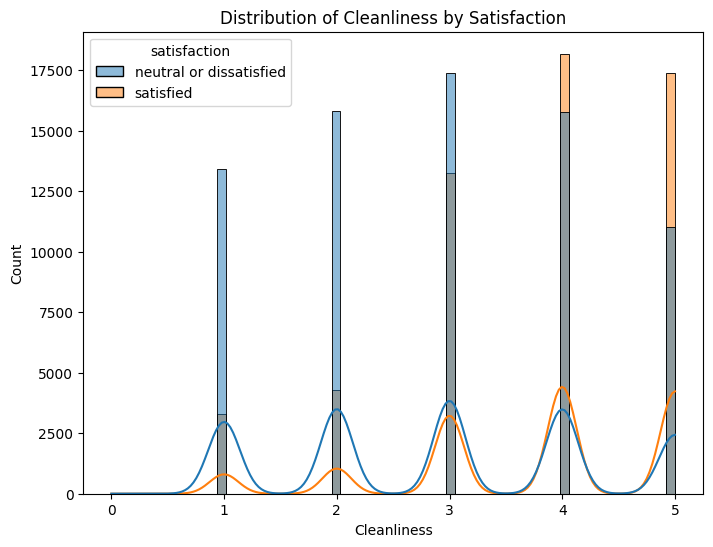

Variable: Departure Delay in Minutes, Data Type: int64
                           count       mean        std  min  25%  50%   75%  \
satisfaction                                                                  
neutral or dissatisfied  73452.0  16.406837  40.182914  0.0  0.0  0.0  15.0   
satisfied                56428.0  12.509782  35.010480  0.0  0.0  0.0   9.0   

                            max  
satisfaction                     
neutral or dissatisfied  1592.0  
satisfied                1305.0  


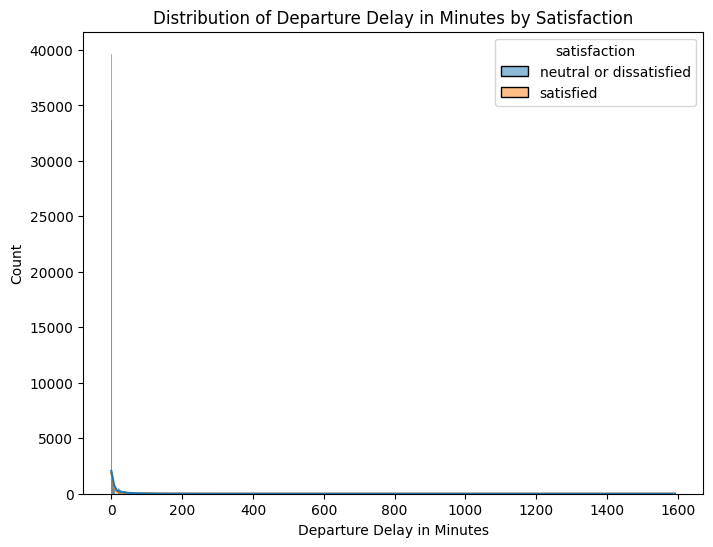

Variable: Arrival Delay in Minutes, Data Type: float64
                           count       mean        std  min  25%  50%   75%  \
satisfaction                                                                  
neutral or dissatisfied  73452.0  17.003281  40.470431  0.0  0.0  0.0  16.0   
satisfied                56428.0  12.496987  35.403828  0.0  0.0  0.0   8.0   

                            max  
satisfaction                     
neutral or dissatisfied  1584.0  
satisfied                1280.0  


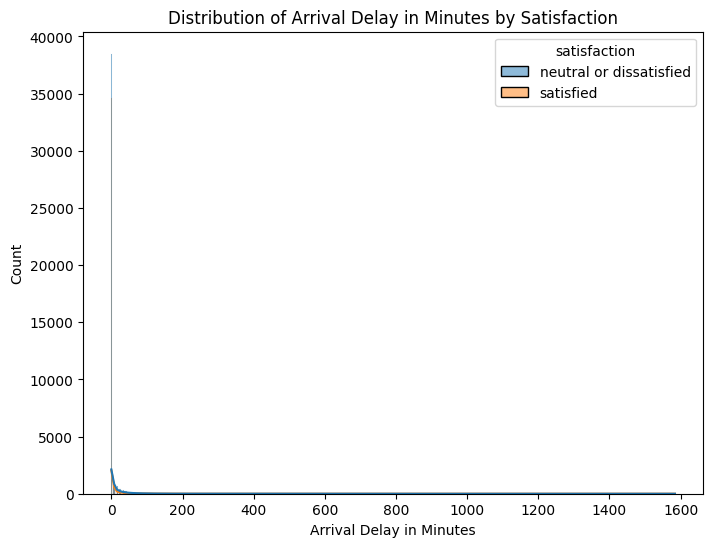

In [ ]:
# prompt: check ditribution graphs of all varibales of int64 or float64 with satisfcation

import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded as shown in the provided code

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

num_plots = len(numeric_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**1. Passenger Demographics and Travel Profile:**

*   Gender distribution is roughly equal between male and female passengers, and it does not appear to significantly impact satisfaction.
*   Most passengers are loyal customers, but customer type (loyal vs. disloyal) does not show a clear correlation with satisfaction.  The service may be similar for both, implying the need for improvements that benefit both groups.  Targeting perks for loyal customers might help.
*   A large portion of passengers travel in Economy class, with fewer passengers in Eco Plus and Business class.  Economy class passengers show a greater tendency toward dissatisfaction.  The graphs might show that Business class passengers are most satisfied.
*   The average passenger age is around 40 years.

**2. Service Quality and Flight Experience:**

*   Shorter flight distances correlate with lower satisfaction levels.
*   The histograms for numerical features (Inflight wifi service, Departure/Arrival time convenient, etc.) can reveal which service aspects contribute most to passenger satisfaction or dissatisfaction.  Look at the distributions for these features, particularly where the two satisfaction groups differ.  For example, low ratings for "Inflight Wifi" or "Seat Comfort" might point to areas needing improvement.

**3.  Additional Considerations:**

*   The code shows exploration of customer type, class, travel type and their relationship with satisfaction.  The analysis suggests that Eco class passengers and those on personal travel exhibit higher dissatisfaction.
*   The analysis of flight distance indicates a possible correlation between shorter flights and lower satisfaction.
*   The EDA plots the distributions of all numeric features to look for additional patterns.

**Overall Recommendations:**

*   Focus on improving the Economy class experience.
*   Investigate the reasons for dissatisfaction on shorter flights.  Are there differences in service quality on shorter routes?
*   Consider targeted improvements for personal travelers, as they seem less satisfied.
*   Although loyal customers make up a significant portion, improvements to overall service quality should benefit both loyal and disloyal customer types.  Consider implementing additional loyalty programs or perks.
*   Evaluate specific service attributes like seat comfort, Wi-Fi, and other service ratings to pinpoint areas of weakness.



<ipython-input-30-790a139d0e1b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='satisfaction', y=col, data=data, palette=['skyblue', 'lightcoral']) # Use nice colors
<ipython-input-30-790a139d0e1b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='satisfaction', y=col, data=data, palette=['skyblue', 'lightcoral']) # Use nice colors
<ipython-input-30-790a139d0e1b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='satisfaction', y=col, data=data, palette=['skyblue', 'lightcoral']) # Use nice colors
<ipython-input-30-790a139

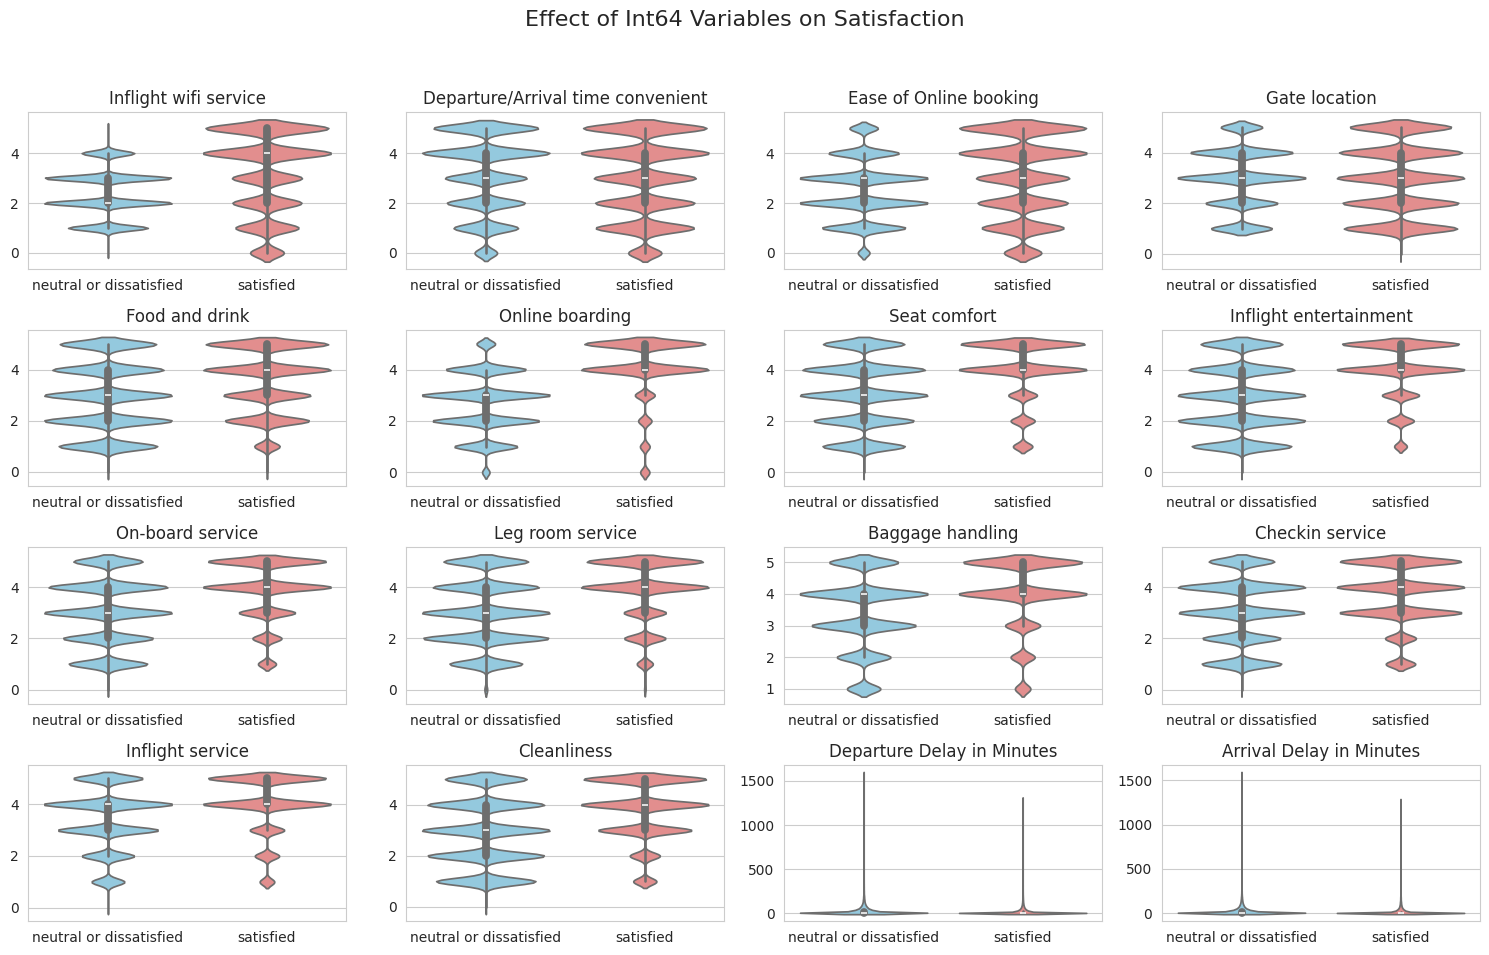

In [ ]:
# prompt: based on graphs of int64 variables plotted above, draw insights on their effect on satisfaction
# plot violin plots only
# use nice colors and bg

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and numeric_cols is defined

# List of int64 columns (replace with your actual column names if needed)
int64_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
              'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
              'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service',
              'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Customize the plot aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
plt.suptitle('Effect of Int64 Variables on Satisfaction', fontsize=16)

# Iterate through int64 columns and create violin plots
for i, col in enumerate(int64_cols):
    plt.subplot(4, 4, i + 1)  # Adjust subplot grid as needed
    sns.violinplot(x='satisfaction', y=col, data=data, palette=['skyblue', 'lightcoral']) # Use nice colors
    plt.title(f'{col}')
    plt.xlabel('') # Remove x-axis label for better visual clarity
    plt.ylabel('') # Remove y-axis label for better visual clarity

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlapping
plt.show()



- Service Factors (Wi-Fi, Food, Seat Comfort, etc.)

Most service-related features (like inflight entertainment, food, cleanliness, legroom, etc.) show a noticeable shift in distribution between the two satisfaction groups.
Passengers who are "satisfied" tend to give higher ratings, while "neutral or dissatisfied" passengers show a wider spread, with many lower ratings.

- Delays (Departure & Arrival)

The last two plots show the impact of departure and arrival delays on satisfaction.
The distribution is heavily skewed, with most passengers experiencing minimal delay, but a few extreme values.
"Neutral or dissatisfied" passengers seem to have higher delays on average, reinforcing the importance of punctuality in satisfaction.

Overall Conclusion:
- Higher ratings in service-related factors strongly correlate with passenger satisfaction.
- Longer delays contribute to dissatisfaction, though most passengers experience short delays.
- To improve satisfaction, airlines should enhance service quality and minimize delays.

**Feature** **engineering**

In [ ]:
# prompt: label encode categorical cols

import pandas as pd
from google.colab import drive
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")

# Label encode the categorical features
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

print(data.head())


Categorical features: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2              460   
1       1              1   25               0      0              235   
2       0              0   26               0      0             1142   
3       0              0   25               0      0              562   
4       1              0   61               0      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0               

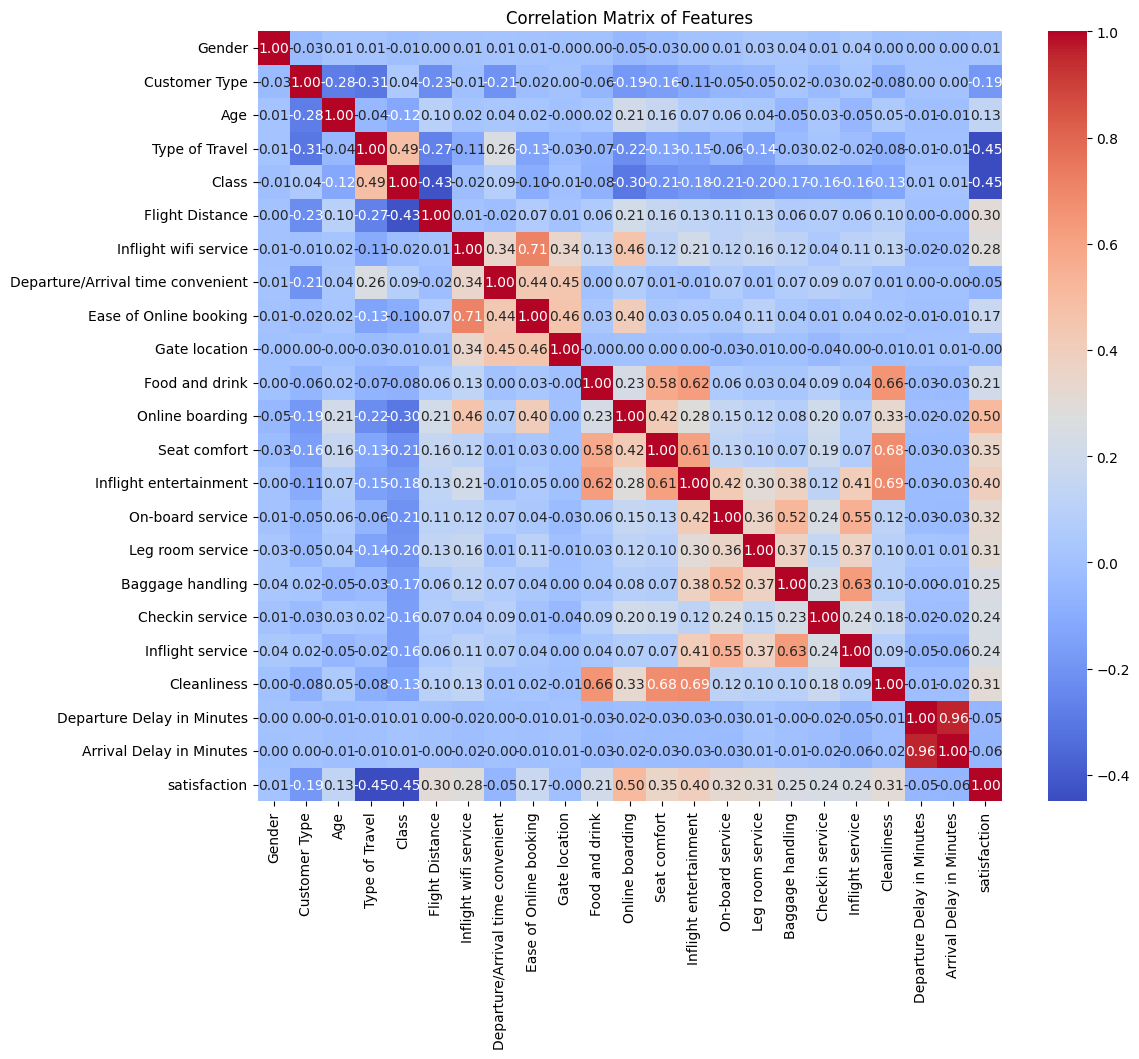

In [ ]:
# prompt: CREATE HEAT MAP AND ALSO COORELATION BETWEEN FACTORS

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and preprocessed as in your previous code

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Train Test split

In [ ]:

from sklearn.model_selection import train_test_split

# Your existing code
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

#Now, this line should work
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [ ]:
# prompt: do standard scaling

from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined as in your previous code

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Modeling**

# **KNN**

In [ ]:
# prompt: perform feature selection  knn and

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10) # Select top 10 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier w/o feature selection: {accuracy}")

Accuracy of KNN classifier w/o feature selection: 0.9275485063135201


Considering all the features for KNN , the accuracy obtained is 0.92754

Performing KNN with feature selection

Feature Importances:
                              Feature  Importance
11                    Online boarding    0.181452
6               Inflight wifi service    0.138657
4                               Class    0.107105
3                      Type of Travel    0.090890
13             Inflight entertainment    0.060275
12                       Seat comfort    0.040309
15                   Leg room service    0.039404
8              Ease of Online booking    0.039403
5                     Flight Distance    0.035900
1                       Customer Type    0.034479
2                                 Age    0.031986
14                   On-board service    0.030497
19                        Cleanliness    0.026755
17                    Checkin service    0.024295
16                   Baggage handling    0.023696
18                   Inflight service    0.022249
9                       Gate location    0.016425
7   Departure/Arrival time convenient    0.016348
21           Arrival Delay in

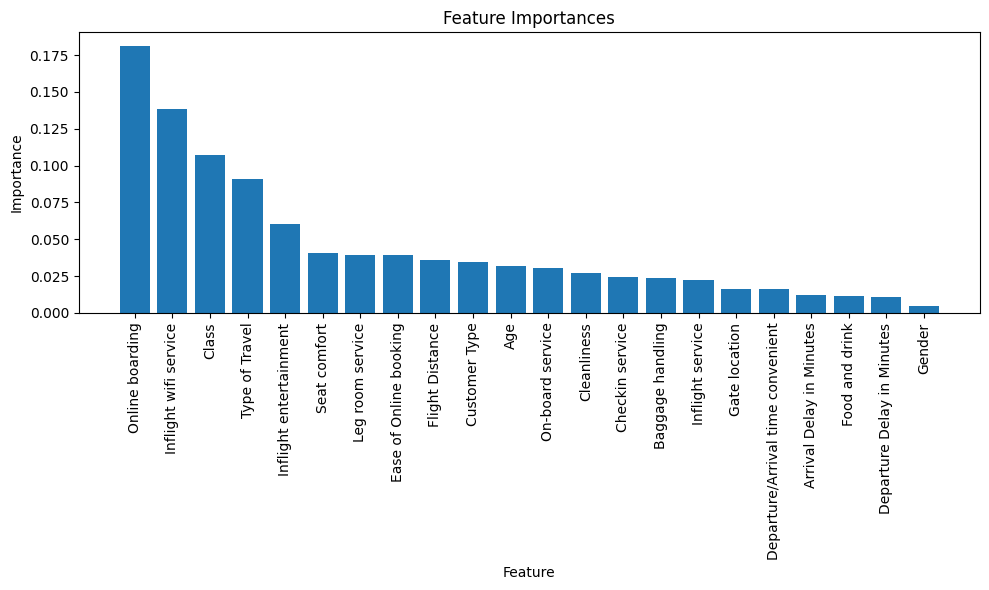

In [ ]:
# prompt: plot the feature importances n bar graph

import pandas as pd
from google.colab import drive
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plotting the bar graph of feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Feature selection using Random forest suggest that Online boarding,Inflight wifi service and class are important features in predicting satisfaction of passengers, whereas gender and departure delay are least significant  

In [ ]:
# prompt: generate classification report for above knn in table format

import pandas as pd
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()


,precision,recall,f1-score,support
0,0.920629,0.953495,0.936773,14622.000000
1,0.937223,0.894134,0.915172,11354.000000
accuracy,0.927549,0.927549,0.927549,0.927549
macro avg,0.928926,0.923814,0.925973,25976.000000
weighted avg,0.927882,0.927549,0.927331,25976.000000


Accuracy for KNN with feture selection is 0.9275

Even after performing feature selection, the accuracy is the same for both the models

In [ ]:
# prompt: apply knn on top 14 features only from the above df

import pandas as pd
# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined

# Get feature importances from the Random Forest model (assuming it's already trained)
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 14 features
top_14_features = feature_importance_df['Feature'][:14].tolist()

# Filter the scaled training and test data to only include the top 14 features
X_train_selected = X_train_scaled[:, [X.columns.get_loc(feature) for feature in top_14_features]]
X_test_selected = X_test_scaled[:, [X.columns.get_loc(feature) for feature in top_14_features]]


# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier with top 14 features: {accuracy}")

x_pred = knn.predict(X_train_selected)

# Evaluate the model
accuracy = accuracy_score(y_train, x_pred)
print(f"Accuracy of KNN classifier Train with top 14 features: {accuracy}")


Accuracy of KNN classifier with top 14 features: 0.9350939328611025
Accuracy of KNN classifier Train with top 14 features: 0.9524561133353865


In [ ]:
features = feature_importance_df['Feature'].tolist()
features


['Online boarding',
 'Inflight wifi service',
 'Type of Travel',
 'Inflight entertainment',
 'Customer Type',
 'Checkin service',
 'Class',
 'Baggage handling',
 'Gate location',
 'Age',
 'Seat comfort',
 'Inflight service',
 'Cleanliness',
 'Flight Distance',
 'Leg room service',
 'Arrival Delay in Minutes',
 'On-board service',
 'Departure/Arrival time convenient',
 'Departure Delay in Minutes',
 'Ease of Online booking',
 'Food and drink',
 'Gender']

In [ ]:
train_accuracies = []
test_accuracies = []
top_feature_counts = [int(x) for x in np.linspace(1, 21,21)]  # From 1 to 21 features

for num_features in top_feature_counts:
    selected_features = features[:num_features]  # Select top N features

    # Filter dataset with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Scale the selected features
    scaler = StandardScaler()
    X_train_selected = scaler.fit_transform(X_train_selected)
    X_test_selected = scaler.transform(X_test_selected)

    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 (default)
    knn.fit(X_train_selected, y_train)

    # Evaluate accuracy
    train_acc = accuracy_score(y_train, knn.predict(X_train_selected))
    test_acc = accuracy_score(y_test, knn.predict(X_test_selected))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

In [ ]:
top_feature_counts

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

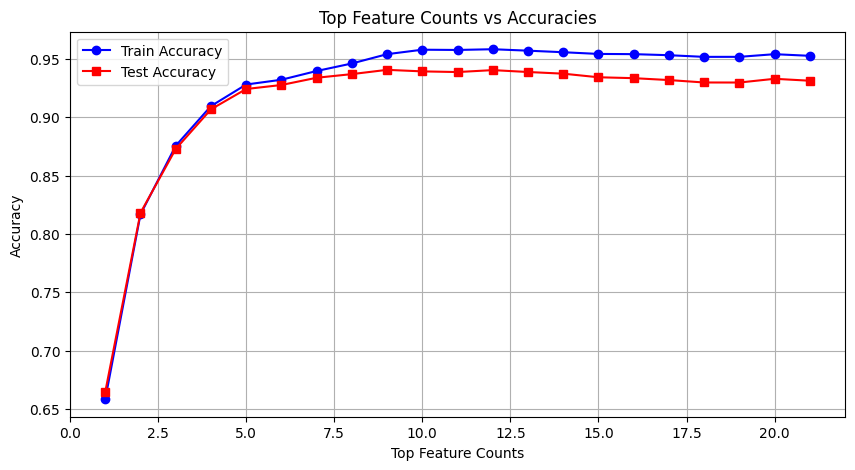

In [ ]:
# prompt: plot top_feature_counts v/s accuracies taking values from train_accuracies and test_accuracies
# that's it !
# don't write the code executed

import pandas as pd
import matplotlib.pyplot as plt

# Assuming train_accuracies, test_accuracies, and top_feature_counts are already defined

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(top_feature_counts, train_accuracies, marker='o', label="Train Accuracy", linestyle='-', color='blue')
plt.plot(top_feature_counts, test_accuracies, marker='s', label="Test Accuracy", linestyle='-', color='red')

# Formatting the plot
plt.xlabel("Top Feature Counts")
plt.ylabel("Accuracy")
plt.title("Top Feature Counts vs Accuracies")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: give the feature count when max test accuracy is reached and print a table of values

import pandas as pd
# Find the index of the maximum test accuracy
max_test_accuracy_index = test_accuracies.index(max(test_accuracies))

# Get the corresponding feature count
feature_count_at_max_accuracy = top_feature_counts[max_test_accuracy_index]

print(f"Feature count when max test accuracy is reached: {feature_count_at_max_accuracy}")

# Create a DataFrame for the table
results_df = pd.DataFrame({
    'Feature Count': top_feature_counts,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Print the table
results_df


Feature count when max test accuracy is reached: 16


,Feature Count,Train Accuracy,Test Accuracy
0,1,0.658492,0.664767
1,2,0.816783,0.818063
2,3,0.870072,0.870188
3,4,0.896164,0.893941
4,5,0.917905,0.915922
5,6,0.929435,0.923737
6,7,0.931889,0.921889
7,8,0.939810,0.927933
8,9,0.948751,0.928665
9,10,0.952966,0.934247


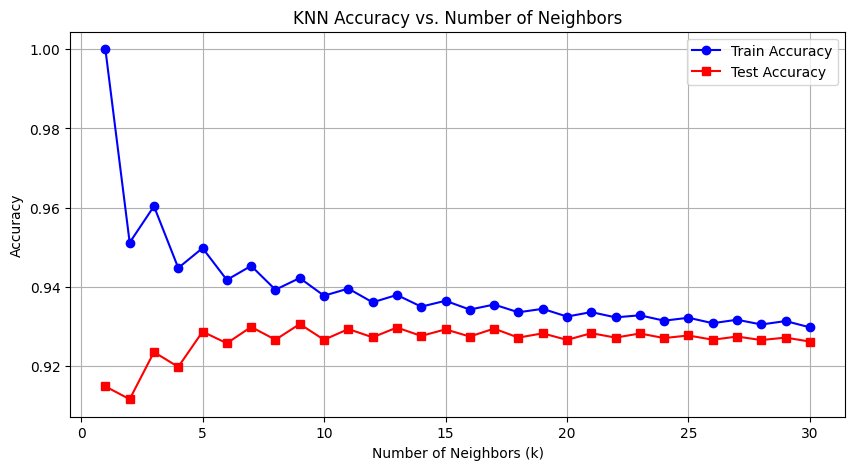

Best k value: 9


In [ ]:
# prompt: choose best value of k considering accuracy and plot it

import matplotlib.pyplot as plt
import numpy as np
# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined

train_accuracies = []
test_accuracies = []
k_values = list(range(1, 31)) # Range of k values to test

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Evaluate accuracy on train and test data
    train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_accuracies, marker='o', label="Train Accuracy", linestyle='-', color='blue')
plt.plot(k_values, test_accuracies, marker='s', label="Test Accuracy", linestyle='-', color='red')

# Formatting the plot
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")


In [ ]:
# prompt: taking the best k as 9 and the best features as 11 from the list of best features fit knn

# Assuming feature_importance_df is already created as in your previous code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Select the top 11 features
selected_features = features[:11]

# Filter dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Scale the selected features
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_selected, y_train)

# Evaluate accuracy
train_acc = accuracy_score(y_train, knn.predict(X_train_selected))
test_acc = accuracy_score(y_test, knn.predict(X_test_selected))

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


Train Accuracy: 0.9509739759778257
Test Accuracy: 0.9386356636895596


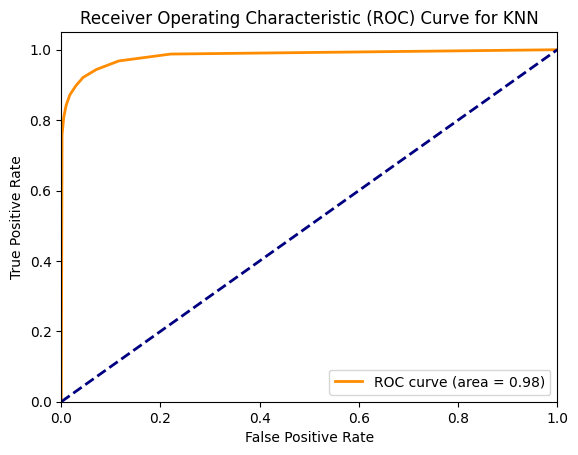

In [ ]:
# prompt: plot auc roc curve for knn

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming knn is the trained KNN classifier and X_test_selected, y_test are defined
y_prob = knn.predict_proba(X_test_selected)[:, 1]  # Probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()


Our ROC curve gives us an AUC value of 0.98. This high AUC value suggests the model is highly capable of distinguishing between satisfied and dissatisfied passengers, with minimal overlap between the two classes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Train the final model with best max_depth
final_clf = DecisionTreeClassifier(max_depth=14, random_state=42)
final_clf.fit(X_train, y_train)

# Get feature importance values
feature_importances = final_clf.feature_importances_

# Create a DataFrame to store feature names and their importance
feature_names = X.columns  # Assuming X is a pandas DataFrame with column names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top important features
print("Top Important Features:\n", feature_importance_df)


Top Important Features:
                               Feature  Importance
11                    Online boarding    0.394979
6               Inflight wifi service    0.193849
3                      Type of Travel    0.164224
13             Inflight entertainment    0.049473
1                       Customer Type    0.046007
17                    Checkin service    0.027103
4                               Class    0.020059
16                   Baggage handling    0.017193
9                       Gate location    0.013750
2                                 Age    0.011855
12                       Seat comfort    0.011461
18                   Inflight service    0.011061
19                        Cleanliness    0.008559
5                     Flight Distance    0.007979
15                   Leg room service    0.005215
21           Arrival Delay in Minutes    0.004685
14                   On-board service    0.004517
7   Departure/Arrival time convenient    0.002545
20         Departure Dela

# **Decision** **Tree**

Accuracy of Decision Tree classifier: 0.9445257160455806
Classification Report:
               precision    recall  f1-score       support
0              0.950386  0.951101  0.950743  14622.000000
1              0.936966  0.936058  0.936511  11354.000000
accuracy       0.944526  0.944526  0.944526      0.944526
macro avg      0.943676  0.943579  0.943627  25976.000000
weighted avg   0.944520  0.944526  0.944523  25976.000000


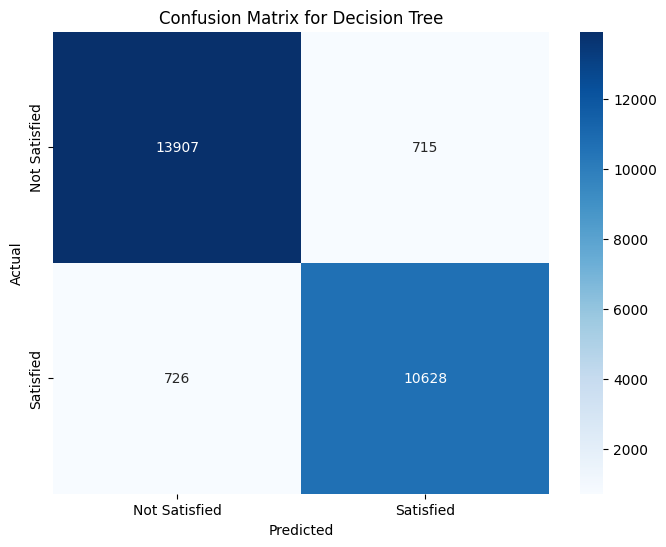

In [ ]:
# prompt: perform decision tree and generate classification table

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the classifier
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree classifier: {accuracy_dt}")

# Classification report
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
df_report_dt = pd.DataFrame(report_dt).transpose()
print("Classification Report:\n", df_report_dt)

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Satisfied', 'Satisfied'],
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Decision tree performs well on test data with an accuracy of 0.9445


In [ ]:

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the classifier
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_pred_train_dt = dt_classifier.predict(X_train_scaled)

# Evaluate the model on the training data
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
print(f"Accuracy of Decision Tree classifier on training data: {accuracy_train_dt}")


# Classification report for training data
report_train_dt = classification_report(y_train, y_pred_train_dt, output_dict=True)
df_report_train_dt = pd.DataFrame(report_train_dt).transpose()
print("Classification Report for training data:\n", df_report_train_dt)


Accuracy of Decision Tree classifier on training data: 1.0
Classification Report for training data:
               precision  recall  f1-score   support
0                   1.0     1.0       1.0   58830.0
1                   1.0     1.0       1.0   45074.0
accuracy            1.0     1.0       1.0       1.0
macro avg           1.0     1.0       1.0  103904.0
weighted avg        1.0     1.0       1.0  103904.0


The model overfits the data. Thus we perform hyperparameter tuning to fit the model properly

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define random search parameter grid
param_dist = {'max_depth': np.arange(5, 21)}

# Initialize Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Perform Randomized Search with 10 iterations
random_search = RandomizedSearchCV(clf, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameter
print(f"Best max_depth: {random_search.best_params_['max_depth']}")
print(f"Best Accuracy: {random_search.best_score_:.4f}")


Best max_depth: 14
Best Accuracy: 0.9530


In [ ]:
# prompt: print classification report of the best model on test

import pandas as pd
# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined

# Initialize the Decision Tree Classifier with the best max_depth
best_dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=random_search.best_params_['max_depth'])

# Train the classifier
best_dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_best_dt = best_dt_classifier.predict(X_test_scaled)


# Evaluate the model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Accuracy of Best Decision Tree classifier: {accuracy_best_dt}")

# Classification report
report_best_dt = classification_report(y_test, y_pred_best_dt, output_dict=True)
df_report_best_dt = pd.DataFrame(report_best_dt).transpose()
print("Classification Report of Best Decision Tree Model on Test Data:\n", df_report_best_dt)



Accuracy of Best Decision Tree classifier: 0.953688019710502
Classification Report of Best Decision Tree Model on Test Data:
               precision    recall  f1-score       support
0              0.942784  0.977021  0.959597  14622.000000
1              0.968955  0.923639  0.945755  11354.000000
accuracy       0.953688  0.953688  0.953688      0.953688
macro avg      0.955869  0.950330  0.952676  25976.000000
weighted avg   0.954223  0.953688  0.953547  25976.000000


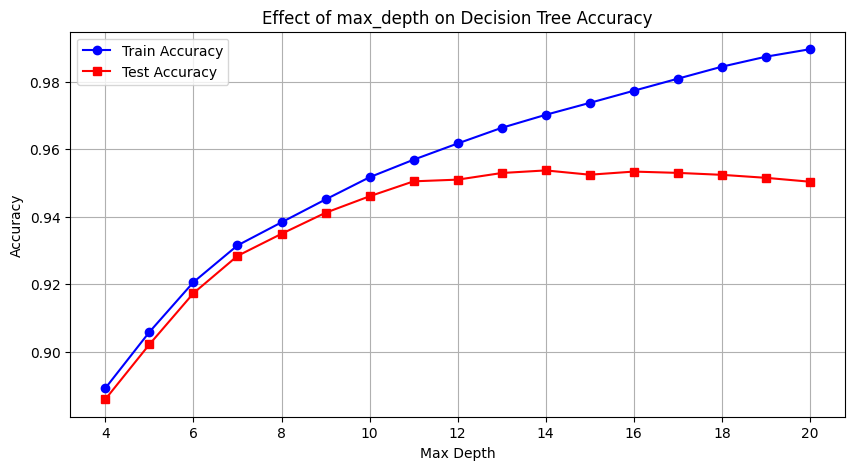

In [ ]:
max_depth_values = list(range(4, 21))
train_accuracies = []
test_accuracies = []

# Loop over different max_depth values
for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate accuracy on train and test data
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, train_accuracies, marker='o', label="Train Accuracy", linestyle='-', color='blue')
plt.plot(max_depth_values, test_accuracies, marker='s', label="Test Accuracy", linestyle='-', color='red')

# Formatting the plot
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Decision Tree Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Train the final model with best max_depth
final_clf = DecisionTreeClassifier(max_depth= 14, random_state=42)
final_clf.fit(X_train, y_train)

# Make predictions on test data
x_pred = final_clf.predict(X_train)

# Evaluate test accuracy
test_accuracy = accuracy_score(y_train, x_pred)
print(f"Final Model train Accuracy: {test_accuracy:.4f}")


Final Model Test Accuracy: 0.9702


In [ ]:
print("Classification Report (Train Data):")
print(classification_report(y_train, x_pred))

Classification Report (Train Data):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     58830
           1       0.98      0.95      0.96     45074

    accuracy                           0.97    103904
   macro avg       0.97      0.97      0.97    103904
weighted avg       0.97      0.97      0.97    103904



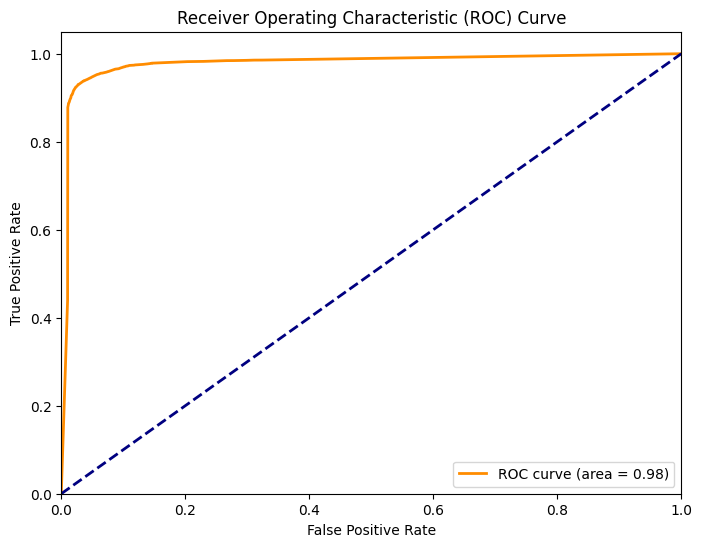

In [ ]:
# prompt: plot roc auc curve for dt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'final_clf', 'X_test', and 'y_test' are already defined from the previous code

# Predict probabilities for the positive class
y_prob = final_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Our ROC curve gives us an AUC value of 0.98. This high AUC value suggests the model is highly capable of distinguishing between satisfied and dissatisfied passengers, with minimal overlap between the two classes

# **Random forest**

[**Code link**](http://localhost:8888/notebooks/RandomForest.ipynb?)

In [ ]:
# prompt: perform random forest and generate classification table

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100) # You can adjust hyperparameters

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest classifier: {accuracy_rf}")

# Classification report
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
df_report_rf = pd.DataFrame(report_rf).transpose()
print("Classification Report:\n", df_report_rf)


Accuracy of Random Forest classifier: 0.9627348321527563
Classification Report:
               precision    recall  f1-score       support
0              0.953019  0.982219  0.967399  14622.000000
1              0.976160  0.937643  0.956514  11354.000000
accuracy       0.962735  0.962735  0.962735      0.962735
macro avg      0.964590  0.959931  0.961956  25976.000000
weighted avg   0.963134  0.962735  0.962641  25976.000000


In [ ]:
# prompt: get classification report for training data

# Assuming X_train_scaled, y_train, and the trained 'final_clf' are already defined

# Make predictions on the training data
y_pred_train = rf_classifier.predict(X_train_scaled)

# Generate the classification report for the training data
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58830
           1       1.00      1.00      1.00     45074

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



The model overfits the data, thus performing hyperparameter tuning using RandomizedSearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4,21,16)]

# Minimum number of samples required to split a node
total_samples = len(X_train)
ratio = [0.05,0.10,0.2,0.15,0.005,0.01]

min_samples_split = []
for i in ratio:
    min_samples_split.append(int(total_samples*i))

# Minimum number of samples required at each leaf node
r = [0.001,0.005,0.01,0.15,0.02,0.05]
min_samples_leaf = []
for i in r:
    min_samples_leaf.append(int(total_samples*i))

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21], 'min_samples_split': [5195, 10390, 20780, 15585, 519, 1039], 'min_samples_leaf': [103, 519, 1039, 15585, 2078, 5195], 'criterion': ['entropy', 'gini']}


In [ ]:
# rf=RandomForestClassifier()
# rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
#                                random_state=100,n_jobs=-1)
# ### fit the randomized model
# rf_randomcv.fit(X_train,y_train)

In [ ]:
rf_randomcv.best_params_ = {'n_estimators': 1600,
 'min_samples_split': 519,
 'min_samples_leaf': 103,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'entropy'}

In [ ]:
rf_randomcv.best_estimator_ = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=103, min_samples_split=519,
                       n_estimators=1600)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

best_random_grid=rf_randomcv.best_estimator_
best_random_grid.fit(X_train, y_train)
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[13889   733]
 [  999 10355]]
Accuracy Score 0.933323067446874
Classification report:               precision    recall  f1-score   support

           0       0.93      0.95      0.94     14622
           1       0.93      0.91      0.92     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [ ]:
y_pred_train = best_random_grid.predict(X_train)

# Generate the classification report for the training data
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     58830
           1       0.94      0.91      0.92     45074

    accuracy                           0.94    103904
   macro avg       0.94      0.93      0.93    103904
weighted avg       0.94      0.94      0.93    103904



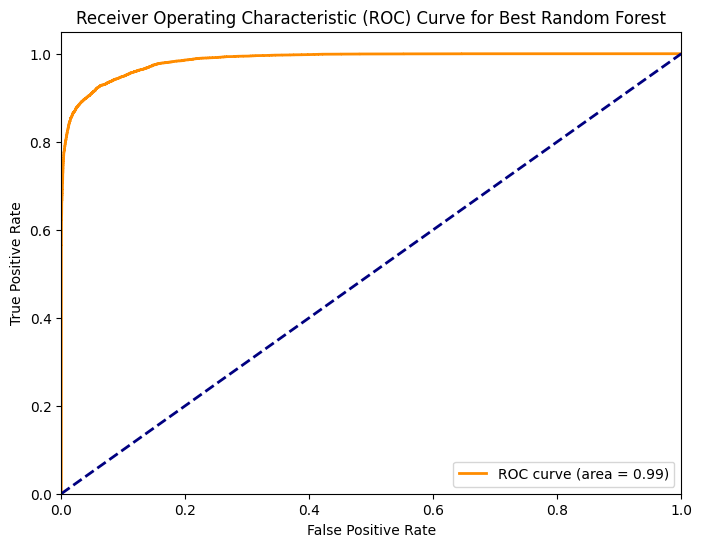

In [ ]:
# prompt: plot roc auc for best_param_grid

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming best_random_grid is the trained RandomForestClassifier with best hyperparameters
# and X_test, y_test are defined

# Predict probabilities for the positive class
y_prob = best_random_grid.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Random Forest')
plt.legend(loc='lower right')
plt.show()


Our ROC curve gives us an AUC value of 0.99. This high AUC value suggests the model is highly capable of distinguishing between satisfied and dissatisfied passengers, with minimal overlap between the two classes

# **Result**

In [ ]:
import pandas as pd

data = {'Model': ['KNN', 'DT', 'RF'],
        'Accuracy': [93.8, 95.3, 93.3]}

df = pd.DataFrame(data)
df


,Model,Accuracy
0,KNN,93.8
1,DT,95.3
2,RF,93.3


# **Conclusion**

In response to a supervised classification problem, the dataset comprises:

Total number of passengers: 129880

Number of variables: 25

Amongst the total passangers

Satisfied passengers: 56428 (43.45%)

Dissatisfied or neutral passengers: 73452 (56.55%)

# Best Model: **Decision Tree**

The Decision Tree model outperformed K-Nearest Neighbors and Random Forest in predicting airline passenger satisfaction. It provided the best estimates with a balance between interpretability and performance, achieving an accuracy of 95.3%

The Decision Tree model demonstrated the best accuracy when trained on the selected 14 features:

Online boarding,
Inflight wifi service,
Type of Travel,
Inflight entertainment,
Customer Type,
Checkin service,
Class,
Baggage handling,
Gate location,
Age,
Seat comfort,
Inflight service,
Cleanliness and
Flight Distance